In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

In [2]:
ser = Service('../chrome_dirver/chromedriver.exe')

driver = webdriver.Chrome(service=ser)

#### 다나와에서 그래픽카드 웹크롤링

In [3]:
url = 'http://search.danawa.com/dsearch.php?k1=%EA%B7%B8%EB%9E%98%ED%94%BD%EC%B9%B4%EB%93%9C&module=goods&act=dispMain'

driver.get(url)

In [4]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [8]:
len(soup.select('div.prod_main_info'))

43

In [32]:
gpuList = soup.select('div.prod_main_info')

In [12]:
prod_zero = soup.select('div.prod_main_info')[0]

In [29]:
prod_zero.text

'\n\n\n\n\n\n이미지보기\n동영상\n\n\n\n\nMSI 지포스 RTX 3070 Ti 슈프림 X D6X 8GB 트라이프로져2S\n\n히트브랜드\n\n\n\n상세 스펙\n\n\nRTX 3070 Ti\n\t \t\t\t\t\t\t\t\t / 8nm\n\t \t\t\t\t\t\t\t\t / 부스트클럭\n\t \t\t\t\t\t\t\t\t: 1860MHz\n\t \t\t\t\t\t\t\t\t / 스트림 프로세서\n\t \t\t\t\t\t\t\t\t: 6144개\n\t \t\t\t\t\t\t\t\t / PCIe4.0x16\n\t \t\t\t\t\t\t\t\t / GDDR6X(DDR6X)\n\t \t\t\t\t\t\t\t\t / 출력단자\n\t \t\t\t\t\t\t\t\t: HDMI2.1\n\t \t\t\t\t\t\t\t\t, DP1.4\n\t \t\t\t\t\t\t\t\t / 부가기능\n\t \t\t\t\t\t\t\t\t: 제로팬(0-dB기술)\n\t \t\t\t\t\t\t\t\t, 8K 해상도 지원\n\t \t\t\t\t\t\t\t\t, 4K 해상도 지원\n\t \t\t\t\t\t\t\t\t, HDR 지원\n\t \t\t\t\t\t\t\t\t, Dual BIOS\n\t \t\t\t\t\t\t\t\t, HDCP 2.3\n\t \t\t\t\t\t\t\t\t / 사용전력\n\t \t\t\t\t\t\t\t\t: 최대 310W\n\t \t\t\t\t\t\t\t\t / 정격파워 850W 이상\n\t \t\t\t\t\t\t\t\t / 전원 포트\n\t \t\t\t\t\t\t\t\t: 8핀 x2개\n\t \t\t\t\t\t\t\t\t / 3개 팬\n\t \t\t\t\t\t\t\t\t / 가로(길이)\n\t \t\t\t\t\t\t\t\t: 335mm\n\t \t\t\t\t\t\t\t\t / 백플레이트\n\t \t\t\t\t\t\t\t\t / LED 라이트\n\t \t\t\t\t\t\t\t\t / MYSTIC LIGHT / A/S 3년 / 그래픽 카드 지지대 포함\t\t\t

In [23]:
prod_zero.select('p.prod_name')[0].text.replace('\n','')

'MSI 지포스 RTX 3070 Ti 슈프림 X D6X 8GB 트라이프로져2S히트브랜드'

In [25]:
prod_zero.select('dl.prod_spec_set>dd')[0].text.replace('\n','').replace('\t','')

'RTX 3070 Ti  / 8nm  / 부스트클럭 : 1860MHz  / 스트림 프로세서 : 6144개  / PCIe4.0x16  / GDDR6X(DDR6X)  / 출력단자 : HDMI2.1 , DP1.4  / 부가기능 : 제로팬(0-dB기술) , 8K 해상도 지원 , 4K 해상도 지원 , HDR 지원 , Dual BIOS , HDCP 2.3  / 사용전력 : 최대 310W  / 정격파워 850W 이상  / 전원 포트 : 8핀 x2개  / 3개 팬  / 가로(길이) : 335mm  / 백플레이트  / LED 라이트  / MYSTIC LIGHT / A/S 3년 / 그래픽 카드 지지대 포함'

In [31]:
prod_zero.select('em.num_c')[0].text.replace(',','')

'1588040'

In [44]:
gpu_list = []
for prod in gpuList:
    name = prod.select('p.prod_name')[0].text.replace('\n','')
    spec = prod.select('dl.prod_spec_set>dd')[0].text.replace('\n','').replace('\t','')
    try:
        price = int(prod.select('em.num_c')[0].text.replace(',',''))
    except:
        price = None
    
    gpu_list.append([name,spec,price])
    
gpu_list[:3]

[['MSI 지포스 RTX 3070 Ti 슈프림 X D6X 8GB 트라이프로져2S히트브랜드',
  'RTX 3070 Ti  / 8nm  / 부스트클럭 : 1860MHz  / 스트림 프로세서 : 6144개  / PCIe4.0x16  / GDDR6X(DDR6X)  / 출력단자 : HDMI2.1 , DP1.4  / 부가기능 : 제로팬(0-dB기술) , 8K 해상도 지원 , 4K 해상도 지원 , HDR 지원 , Dual BIOS , HDCP 2.3  / 사용전력 : 최대 310W  / 정격파워 850W 이상  / 전원 포트 : 8핀 x2개  / 3개 팬  / 가로(길이) : 335mm  / 백플레이트  / LED 라이트  / MYSTIC LIGHT / A/S 3년 / 그래픽 카드 지지대 포함',
  1588040],
 ['MSI 라데온 RX 6800 XT 게이밍 X 트리오 D6 16GB 트라이프로져2히트브랜드',
  'RX 6800 XT  / 7nm  / 베이스클럭 : 1850MHz  / 부스트클럭 : 2285MHz  / 스트림 프로세서 : 4608개  / PCIe4.0x16  / GDDR6(DDR6)  / 출력단자 : HDMI2.1 , DP1.4  / 부가기능 : 제로팬(0-dB기술) , 8K 해상도 지원 , 4K 해상도 지원 , HDR 지원 , HDCP 지원  / 사용전력 : 최대 300W  / 정격파워 750W 이상  / 전원 포트 : 8핀 x2개  / 3개 팬  / 가로(길이) : 324mm  / 백플레이트  / LED 라이트  / MYSTIC LIGHT / A/S 3년 / 인피니티 캐시: 128MB / RDNA2 / 그래픽 카드 지지대 포함',
  1689950],
 ['이엠텍 지포스 RTX 3060 STORM X Dual OC D6 12GB이벤트 ',
  'RTX 3060 / 8nm / 부스트클럭: 1837MHz / 스트림 프로세서: 3584개 / PCIe4.0x16 / GDDR6(DDR6) / 출력단자: HDMI2.1, DP1.4 / 부가기능: 제로팬(0

In [43]:
gpu_list_df = pd.DataFrame(gpu_list,
                          columns = ['제품명','상세정보','가격'])
gpu_list_df

,제품명,상세정보,가격
0,MSI 지포스 RTX 3070 Ti 슈프림 X D6X 8GB 트라이프로져2S히트브랜드,RTX 3070 Ti / 8nm / 부스트클럭 : 1860MHz / 스트림 프...,1588040.0
1,MSI 라데온 RX 6800 XT 게이밍 X 트리오 D6 16GB 트라이프로져2히트브랜드,RX 6800 XT / 7nm / 베이스클럭 : 1850MHz / 부스트클럭 ...,1689950.0
2,이엠텍 지포스 RTX 3060 STORM X Dual OC D6 12GB이벤트,RTX 3060 / 8nm / 부스트클럭: 1837MHz / 스트림 프로세서: 35...,909950.0
3,이엠텍 지포스 RTX 3070 Ti BLACK EDITION D6X 8GB이벤트,RTX 3070 Ti / 8nm / 베이스클럭: 1575MHz / 부스트클럭: 17...,1462410.0
4,이엠텍 지포스 GTX 1650 STORM X Dual MINI OC D6 4GB이벤트,GTX 1650 / 12nm / 베이스클럭: 1410MHz / 부스트클럭: 1725...,417380.0
5,MjXSDYRHj5,MjXSDYRHj5564797,NaN
6,MSI 지포스 RTX 3060 게이밍 X D6 12GB 트윈프로져8,RTX 3060 / 8nm / 부스트클럭: 1837MHz / 스트림 프로세서: 35...,957330.0
7,MSI 지포스 RTX 3070 Ti 슈프림 X D6X 8GB 트라이프로져2S,RTX 3070 Ti / 8nm / 부스트클럭: 1860MHz / 스트림 프로세서:...,1588040.0
8,MSI 지포스 RTX 3060 Ti 게이밍 X D6 8GB 트윈프로져8 LHR,RTX 3060 Ti / 8nm / 부스트클럭: 1770MHz / 스트림 프로세서:...,1184170.0
9,ZOTAC GAMING 지포스 RTX 3060 TWIN Edge OC D6 12GB...,RTX 3060 / 8nm / 부스트클럭: 1807MHz / 스트림 프로세서: 35...,916440.0


In [196]:
gpu_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품명     43 non-null     object 
 1   상세정보    43 non-null     object 
 2   가격      40 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


##### 1~10페이지 까지 크롤링하기

- 첫 페이지에서 크롤링한 과정을 함수로 만들기

In [48]:
keyword = '그래픽카드'
page = '1'
url = '''http://search.danawa.com/dsearch.php?query={0}&originalQuery={0}&volumeType=allvs&page={1}
&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y
&defaultUICategoryCode=112753&defaultPhysicsCategoryCode=861%7C876%7C972%7C0&defaultVmTab=40663
&defaultVaTab=468778&tab=main'''.format(keyword,page)
url

'http://search.danawa.com/dsearch.php?query=그래픽카드&originalQuery=그래픽카드&volumeType=allvs&page=1\n&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y\n&defaultUICategoryCode=112753&defaultPhysicsCategoryCode=861%7C876%7C972%7C0&defaultVmTab=40663\n&defaultVaTab=468778&tab=main'

In [53]:
def get_url(keyword,page):
    url = '''http://search.danawa.com/dsearch.php?query={0}&originalQuery={0}&volumeType=allvs&page={1}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=112753&defaultPhysicsCategoryCode=861%7C876%7C972%7C0&defaultVmTab=40663&defaultVaTab=468778&tab=main'''.format(keyword,page)
    return url

In [54]:
get_url('그래픽카드','1')

'http://search.danawa.com/dsearch.php?query=그래픽카드&originalQuery=그래픽카드&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=112753&defaultPhysicsCategoryCode=861%7C876%7C972%7C0&defaultVmTab=40663&defaultVaTab=468778&tab=main'

In [57]:
def get_page_data(gpuList):
   
    gpu_list = []
    
    for prod in gpuList:
        name = prod.select('p.prod_name')[0].text.replace('\n','')
        spec = prod.select('dl.prod_spec_set>dd')[0].text.replace('\n','').replace('\t','')
        try:
            price = int(prod.select('em.num_c')[0].text.replace(',',''))
        except:
            price = None

        gpu_list.append([name,spec,price])
    return gpu_list

In [56]:
import time
from tqdm import tqdm_notebook
from tqdm import notebook

In [58]:
keyword = '그래픽카드'
total_page = 10
prod_data_total = []

for page in notebook.tqdm(range(1,total_page+1)):
    driver.get(get_url(keyword,page))
    time.sleep(3)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    prod_items = soup.select('div.prod_main_info')
    prod_item_list = get_page_data(prod_items)
    
    prod_data_total += prod_item_list

  0%|          | 0/10 [00:00<?, ?it/s]

In [61]:
prod_data_total[:5]

[['MSI 라데온 RX 6800 XT 게이밍 X 트리오 D6 16GB 트라이프로져2히트브랜드',
  'RX 6800 XT  / 7nm  / 베이스클럭 : 1850MHz  / 부스트클럭 : 2285MHz  / 스트림 프로세서 : 4608개  / PCIe4.0x16  / GDDR6(DDR6)  / 출력단자 : HDMI2.1 , DP1.4  / 부가기능 : 제로팬(0-dB기술) , 8K 해상도 지원 , 4K 해상도 지원 , HDR 지원 , HDCP 지원  / 사용전력 : 최대 300W  / 정격파워 750W 이상  / 전원 포트 : 8핀 x2개  / 3개 팬  / 가로(길이) : 324mm  / 백플레이트  / LED 라이트  / MYSTIC LIGHT / A/S 3년 / 인피니티 캐시: 128MB / RDNA2 / 그래픽 카드 지지대 포함',
  1689950],
 ['MSI 지포스 RTX 3070 Ti 슈프림 X D6X 8GB 트라이프로져2S히트브랜드',
  'RTX 3070 Ti  / 8nm  / 부스트클럭 : 1860MHz  / 스트림 프로세서 : 6144개  / PCIe4.0x16  / GDDR6X(DDR6X)  / 출력단자 : HDMI2.1 , DP1.4  / 부가기능 : 제로팬(0-dB기술) , 8K 해상도 지원 , 4K 해상도 지원 , HDR 지원 , Dual BIOS , HDCP 2.3  / 사용전력 : 최대 310W  / 정격파워 850W 이상  / 전원 포트 : 8핀 x2개  / 3개 팬  / 가로(길이) : 335mm  / 백플레이트  / LED 라이트  / MYSTIC LIGHT / A/S 3년 / 그래픽 카드 지지대 포함',
  1588180],
 ['이엠텍 지포스 RTX 3060 STORM X Dual OC D6 12GB이벤트 ',
  'RTX 3060 / 8nm / 부스트클럭: 1837MHz / 스트림 프로세서: 3584개 / PCIe4.0x16 / GDDR6(DDR6) / 출력단자: HDMI2.1, DP1.4 / 부가기능: 제로팬(0

In [62]:
data_df = pd.DataFrame(prod_data_total,
                      columns = ['제품명','상세설명','가격'])
data_df

,제품명,상세설명,가격
0,MSI 라데온 RX 6800 XT 게이밍 X 트리오 D6 16GB 트라이프로져2히트브랜드,RX 6800 XT / 7nm / 베이스클럭 : 1850MHz / 부스트클럭 ...,1689950.0
1,MSI 지포스 RTX 3070 Ti 슈프림 X D6X 8GB 트라이프로져2S히트브랜드,RTX 3070 Ti / 8nm / 부스트클럭 : 1860MHz / 스트림 프...,1588180.0
2,이엠텍 지포스 RTX 3060 STORM X Dual OC D6 12GB이벤트,RTX 3060 / 8nm / 부스트클럭: 1837MHz / 스트림 프로세서: 35...,909950.0
3,이엠텍 지포스 RTX 3070 Ti BLACK EDITION D6X 8GB이벤트,RTX 3070 Ti / 8nm / 베이스클럭: 1575MHz / 부스트클럭: 17...,1463670.0
4,이엠텍 지포스 GTX 1650 STORM X Dual MINI OC D6 4GB이벤트,GTX 1650 / 12nm / 베이스클럭: 1410MHz / 부스트클럭: 1725...,417380.0
...,...,...,...
407,EVGA 지포스 RTX 2060 XC GAMING D6 12GB,RTX 2060 / 12nm / 부스트클럭: 1680MHz / 스트림 프로세서: 2...,834700.0
408,GIGABYTE 지포스 RTX 3080 Ti Gaming OC D6X 12GB 피씨디렉트,RTX 3080 Ti / 8nm / 부스트클럭: 1710MHz / 스트림 프로세서:...,2438940.0
409,GIGABYTE AORUS 지포스 RTX 3080 Ti Master D6X 12GB...,RTX 3080 Ti / 8nm / 부스트클럭: 1770MHz / 스트림 프로세서:...,2721070.0
410,GIGABYTE 지포스 GTX 1650 MINI ITX OC D5 4GB 피씨디렉트,GTX 1650 / 12nm / 부스트클럭: 1680MHz / 스트림 프로세서: 8...,455090.0


In [143]:
data_df.to_excel('./my_excel.xlsx', index = False)

In [238]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 411
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제품명     393 non-null    object
 1   상세설명    393 non-null    object
 2   가격      393 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 18.8+ KB


In [63]:
data_new = pd.DataFrame()

# 제조사 : 제품명.split(' ')[0]
# 모델명 : 상세정보.split('/')[0].strip()
# 부스트클럭 : 
# 스트림 프로세서: 
# 8k 해상도 지원:  Y/N 다음번에;
# 가격:

In [69]:
data_df.dropna(inplace = True)

In [82]:
len(data_df)

393

In [198]:
data_df.head(10)

,제품명,상세설명,가격
0,MSI 라데온 RX 6800 XT 게이밍 X 트리오 D6 16GB 트라이프로져2히트브랜드,RX 6800 XT / 7nm / 베이스클럭 : 1850MHz / 부스트클럭 ...,1689950
1,MSI 지포스 RTX 3070 Ti 슈프림 X D6X 8GB 트라이프로져2S히트브랜드,RTX 3070 Ti / 8nm / 부스트클럭 : 1860MHz / 스트림 프...,1588180
2,이엠텍 지포스 RTX 3060 STORM X Dual OC D6 12GB이벤트,RTX 3060 / 8nm / 부스트클럭: 1837MHz / 스트림 프로세서: 35...,909950
3,이엠텍 지포스 RTX 3070 Ti BLACK EDITION D6X 8GB이벤트,RTX 3070 Ti / 8nm / 베이스클럭: 1575MHz / 부스트클럭: 17...,1463670
4,이엠텍 지포스 GTX 1650 STORM X Dual MINI OC D6 4GB이벤트,GTX 1650 / 12nm / 베이스클럭: 1410MHz / 부스트클럭: 1725...,417380
5,MSI 지포스 RTX 3060 게이밍 X D6 12GB 트윈프로져8,RTX 3060 / 8nm / 부스트클럭: 1837MHz / 스트림 프로세서: 35...,957110
7,MSI 지포스 RTX 3070 Ti 슈프림 X D6X 8GB 트라이프로져2S,RTX 3070 Ti / 8nm / 부스트클럭: 1860MHz / 스트림 프로세서:...,1588180
8,MSI 지포스 RTX 3060 Ti 게이밍 X D6 8GB 트윈프로져8 LHR,RTX 3060 Ti / 8nm / 부스트클럭: 1770MHz / 스트림 프로세서:...,1183960
9,ZOTAC GAMING 지포스 RTX 3060 TWIN Edge OC D6 12GB...,RTX 3060 / 8nm / 부스트클럭: 1807MHz / 스트림 프로세서: 35...,916390
10,이엠텍 XENON 지포스 RTX 3080 TURBO JET OC D6X 10GB LHR,RTX 3080 / 8nm / 부스트클럭: 1860MHz / 스트림 프로세서: 87...,1942840


In [78]:
data_df['제품명'][0]

'MSI 라데온 RX 6800 XT 게이밍 X 트리오 D6 16GB 트라이프로져2히트브랜드'

In [79]:
data_df['제품명'][0].split(' ')

['MSI',
 '라데온',
 'RX',
 '6800',
 'XT',
 '게이밍',
 'X',
 '트리오',
 'D6',
 '16GB',
 '트라이프로져2히트브랜드']

In [92]:
company_list = []
for title in data_df['제품명']:
    name = title.split(' ')[0]
    company_list.append(name)

len(company_list)

393

In [89]:
data_df['상세설명'][0].split('/',1)[0].strip()

'RX 6800 XT'

In [94]:
model_list = []
for model in data_df['상세설명']:
    mod_name = model.split('/',1)[0].strip()
    model_list.append(mod_name)
    
len(model_list)

393

In [103]:
data_df['상세설명'][0].split('/')

['RX 6800 XT  ',
 ' 7nm  ',
 ' 베이스클럭 : 1850MHz  ',
 ' 부스트클럭 : 2285MHz  ',
 ' 스트림 프로세서 : 4608개  ',
 ' PCIe4.0x16  ',
 ' GDDR6(DDR6)  ',
 ' 출력단자 : HDMI2.1 , DP1.4  ',
 ' 부가기능 : 제로팬(0-dB기술) , 8K 해상도 지원 , 4K 해상도 지원 , HDR 지원 , HDCP 지원  ',
 ' 사용전력 : 최대 300W  ',
 ' 정격파워 750W 이상  ',
 ' 전원 포트 : 8핀 x2개  ',
 ' 3개 팬  ',
 ' 가로(길이) : 324mm  ',
 ' 백플레이트  ',
 ' LED 라이트  ',
 ' MYSTIC LIGHT ',
 ' A',
 'S 3년 ',
 ' 인피니티 캐시: 128MB ',
 ' RDNA2 ',
 ' 그래픽 카드 지지대 포함']

In [117]:
('정격파워' in data_df['상세설명'][0].split('/')[10])

True

In [120]:
condition = ('정격파워' in data_df['상세설명'][0].split('/')[10])
condition

-1

In [106]:
spec_lists = data_df['상세설명'][0].split('/')

In [130]:
for spec in spec_lists:
    if '부스트클럭' in spec:
        boost = spec
    elif '스트림 프로세서' in spec:
        stream = spec
    elif '8K 해상도 지원' in spec:
        eightK = spec

print(boost)
print(stream)
print(eightK)

 부스트클럭 : 2285MHz  
 스트림 프로세서 : 4608개  
 부가기능 : 제로팬(0-dB기술) , 8K 해상도 지원 , 4K 해상도 지원 , HDR 지원 , HDCP 지원  


In [156]:
spec_lists = data_df['상세설명'][3].split('/')
for spec in spec_lists:
    if '부스트클럭' in spec:
        boost = spec
    elif '스트림 프로세서' in spec:
        stream = spec
    elif '8K' in spec:
        eightK = spec

print(boost)
print(stream)
print(eightK)

 부스트클럭: 1770MHz 
 스트림 프로세서: 6144개 
 부가기능: 제로팬(0-dB기술), 8K 해상도 지원, 4K 해상도 지원, HDR 지원, HDCP 2.3 


In [188]:
boost_list = []
stream_list = []

for spec_data in data_df['상세설명']:
    spec_lists = spec_data.split('/')
    for spec in spec_lists:
        if '부스트클럭' in spec:
            boost = spec
        elif '스트림 프로세서' in spec:
            stream = spec
        
    boost_value = int(boost.split(':')[1].strip().split('MHz')[0])
    boost_list.append(boost_value)
    
    stream_value = int(stream.split(':')[1].strip().split('개')[0])
    stream_list.append(stream_value)

In [189]:
print(boost_list[:5])
print(stream_list[:5])

[2285, 1860, 1837, 1770, 1725]
[4608, 6144, 3584, 6144, 896]


In [217]:
type(data_df['가격'])

pandas.core.series.Series

In [240]:
data_new = pd.DataFrame()

data_new['제조사'] = company_list
data_new['모델명'] = model_list
data_new['부스트클럭(MHz)'] = boost_list
data_new['스트림 프로세서 개수'] = stream_list
data_new['가격'] = data_df['가격']

In [241]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   제조사          393 non-null    object 
 1   모델명          393 non-null    object 
 2   부스트클럭(MHz)   393 non-null    int64  
 3   스트림 프로세서 개수  393 non-null    int64  
 4   가격           374 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 15.5+ KB


In [229]:
data_new.to_excel('./my_excel_2.xlsx', index = False)

In [203]:
len(data_df['가격'])

393

In [204]:
len(data_new['가격'])

393

In [230]:
data_df['가격'].head(10)

0     1689950
1     1588180
2      909950
3     1463670
4      417380
5      957110
7     1588180
8     1183960
9      916390
10    1942840
Name: 가격, dtype: int32

In [231]:
data_new['가격'].head(10)

0    1689950.0
1    1588180.0
2     909950.0
3    1463670.0
4     417380.0
5     957110.0
6          NaN
7    1588180.0
8    1183960.0
9     916390.0
Name: 가격, dtype: float64

---

In [2]:
data_df = pd.read_excel('./my_excel.xlsx')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제품명     393 non-null    object
 1   상세설명    393 non-null    object
 2   가격      393 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.3+ KB


In [3]:
data_new = pd.read_excel('./my_excel_2.xlsx')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   제조사          393 non-null    object 
 1   모델명          393 non-null    object 
 2   부스트클럭(MHz)   393 non-null    int64  
 3   스트림 프로세서 개수  393 non-null    int64  
 4   가격           374 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 15.5+ KB


In [4]:
data_new['가격'] = data_df['가격']
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   제조사          393 non-null    object
 1   모델명          393 non-null    object
 2   부스트클럭(MHz)   393 non-null    int64 
 3   스트림 프로세서 개수  393 non-null    int64 
 4   가격           393 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.5+ KB


In [5]:
data_new.to_excel('./my_excel_2.xlsx', index = False)

In [6]:
data_new.head()

,제조사,모델명,부스트클럭(MHz),스트림 프로세서 개수,가격
0,MSI,RX 6800 XT,2285,4608,1689950
1,MSI,RTX 3070 Ti,1860,6144,1588180
2,이엠텍,RTX 3060,1837,3584,909950
3,이엠텍,RTX 3070 Ti,1770,6144,1463670
4,이엠텍,GTX 1650,1725,896,417380


In [16]:
dataMSI = data_new[data_new['제조사'].isin(['MSI'])]

In [4]:
import pandas as pd

In [5]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family = 'Malgun Gothic')

In [6]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data_new = pd.read_excel('./my_excel_2.xlsx')

In [25]:
chart_data_selected = data_new[:20]
chart_data_selected

,제조사,모델명,부스트클럭(MHz),스트림 프로세서 개수,가격
0,MSI,RX 6800 XT,2285,4608,1689950
1,MSI,RTX 3070 Ti,1860,6144,1588180
2,이엠텍,RTX 3060,1837,3584,909950
3,이엠텍,RTX 3070 Ti,1770,6144,1463670
4,이엠텍,GTX 1650,1725,896,417380
5,MSI,RTX 3060,1837,3584,957110
6,MSI,RTX 3070 Ti,1860,6144,1588180
7,MSI,RTX 3060 Ti,1770,4864,1183960
8,ZOTAC,RTX 3060,1807,3584,916390
9,이엠텍,RTX 3080,1860,8704,1942840


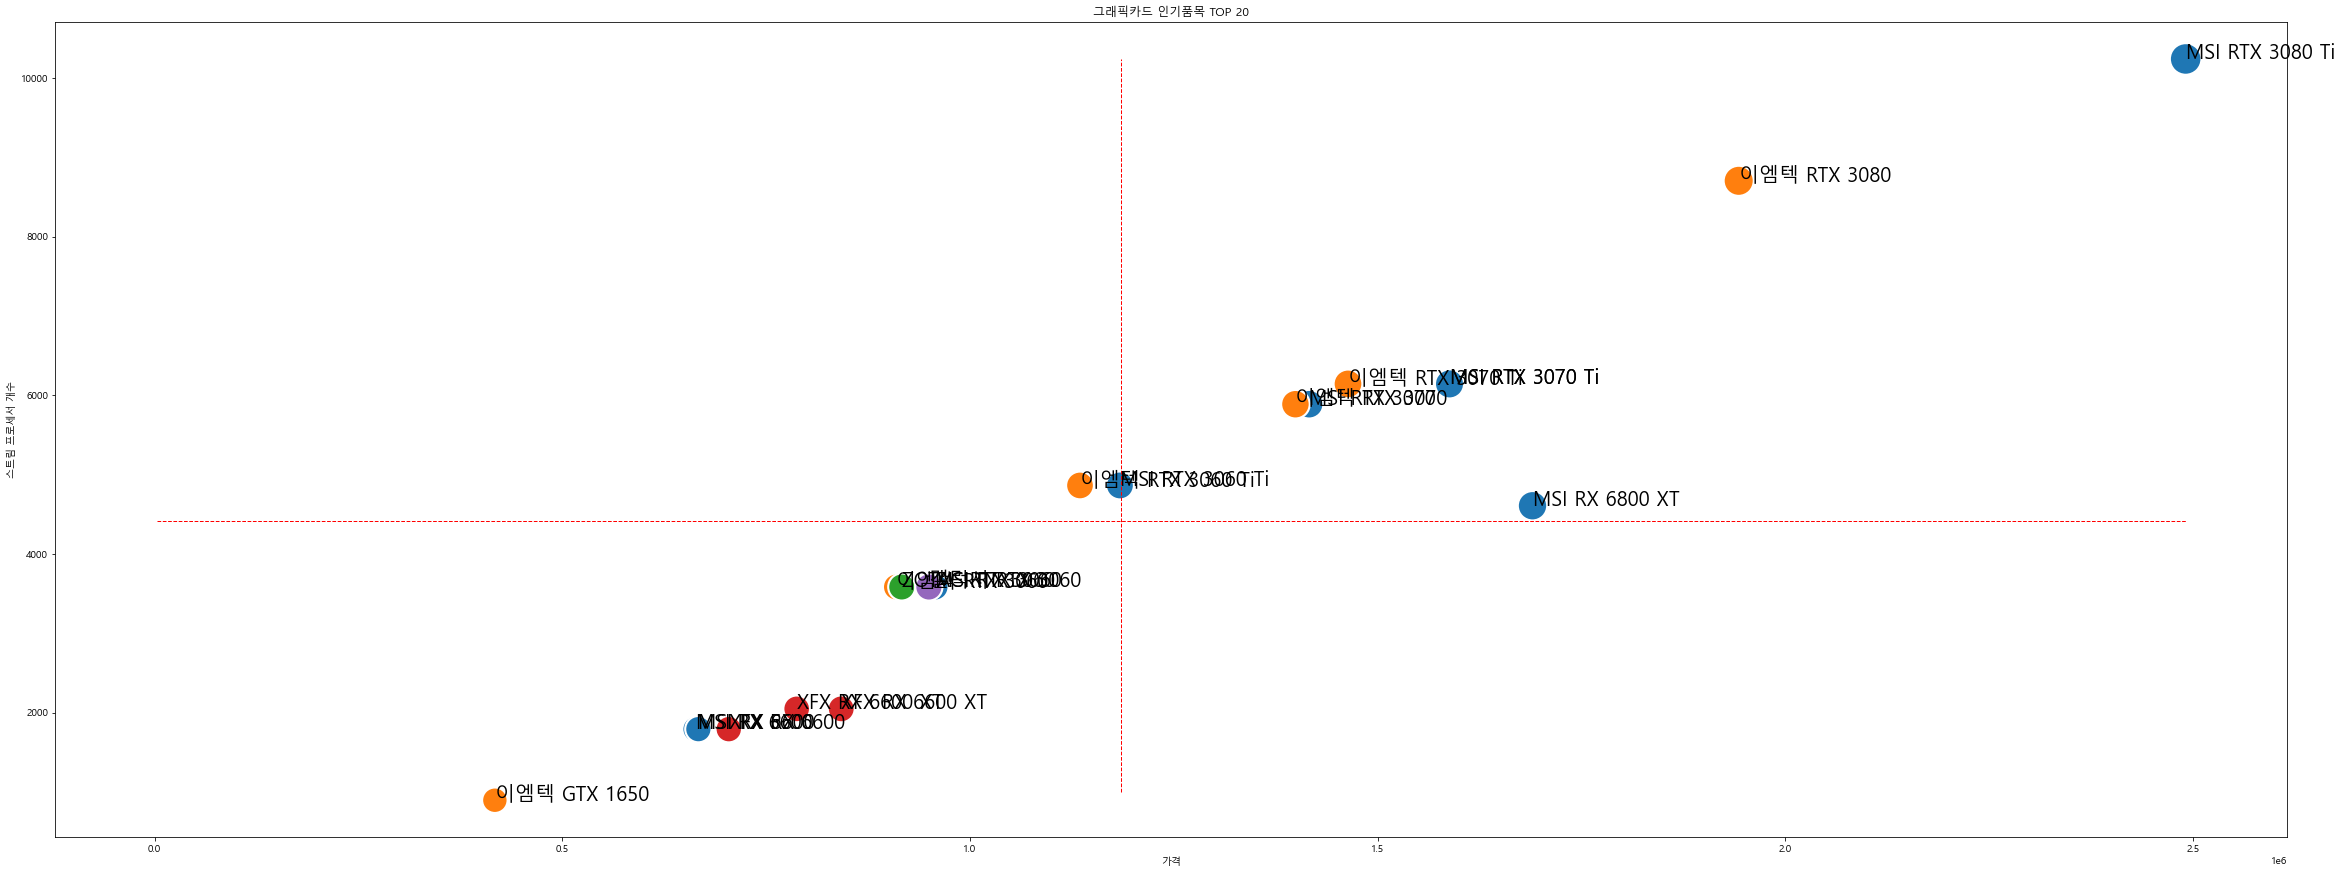

In [26]:
boost_max_value = chart_data_selected['가격'].max()
boost_mean_value = chart_data_selected['가격'].mean()
stream_max_value = chart_data_selected['스트림 프로세서 개수'].max()
stream_mean_value = chart_data_selected['스트림 프로세서 개수'].mean()
sizeMin = chart_data_selected['부스트클럭(MHz)'].min()/chart_data_selected['부스트클럭(MHz)'].max()*1000
sizeMax = 1000
plt.figure(figsize=(40, 15))
plt.title("그래픽카드 인기품목 TOP 20")
sns.scatterplot(x = '가격', 
                  y = '스트림 프로세서 개수', 
                  size = '가격', 
                  hue = chart_data_selected['제조사'], 
                  data = chart_data_selected,
                  sizes = (sizeMin,sizeMax),
                  legend = False)
plt.plot([2500, boost_max_value], 
          [stream_mean_value, stream_mean_value], 
          'r--', 
          lw = 1 )
plt.plot([boost_mean_value, boost_mean_value], 
          [1000, stream_max_value], 
          'r--', 
          lw = 1 )
for index, row in chart_data_selected.iterrows():
    x = row['가격']
    y = row['스트림 프로세서 개수']
    s = (row['제조사']+' '+row['모델명'])
    plt.text(x, y, s, size=20)
plt.show()